In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: 

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13574144/13568290 [==============================]13574144/13568290 [==============================] - 3s 0us/step



In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.10,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.00


In [5]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
         indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
         data.append(np.reshape(dataset[indices], (history_size, 1)))
         labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [10]:
!pip install tensorflow==2.0

  Using cached https://files.pythonhosted.org/packages/c8/a1/2ab46a175c916b0149ccb9edc06202bce6365455779fa251c1f59a4c7806/tensorflow-2.0.0-cp36-cp36m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
  Using 

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
TRAIN_SPLIT = 300000
#tf.random.set_seed(13)

AttributeError: module 'tensorflow' has no attribute 'random'

In [13]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

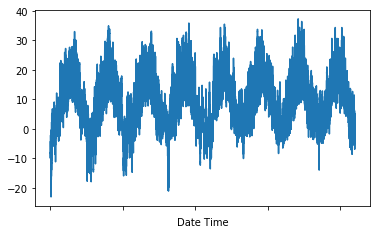

In [14]:
uni_data.plot(subplots=True);

In [15]:
uni_data = uni_data.values

In [16]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [17]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [71]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
y_train_uni = y_train_uni.reshape((-1,1))

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [72]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]

 Target temperature to predict
[-2.10418486]


In [73]:
def create_time_steps(length):
    time_steps = []
    for i in range(-length, 0, 1):
        time_steps.append(i)
    return time_steps

In [74]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from '//anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/pyplot.py'>

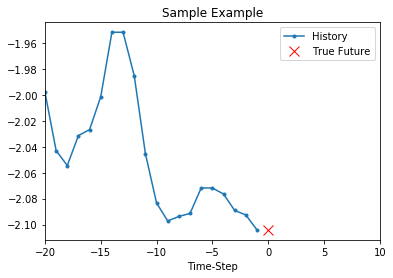

In [75]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [76]:
def baseline(history):
    return np.mean(history)

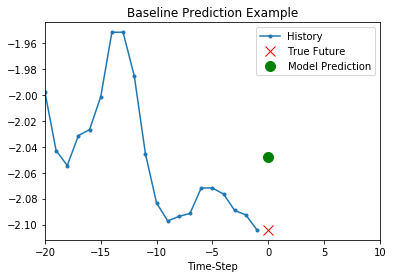

In [77]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example');

In [78]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [79]:
val_univariate.take

<bound method Dataset.take of <RepeatDataset shapes: ((?, 20, 1), (?,)), types: (tf.float64, tf.float64)>>

In [80]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [34]:
#for x, y in val_univariate.take(1):
    #print(simple_lstm_model.predict(x).shape)

In [82]:
val_univariate

<RepeatDataset shapes: ((?, 20, 1), (?,)), types: (tf.float64, tf.float64)>

In [83]:
tf.data.Dataset.

SyntaxError: invalid syntax (<ipython-input-83-bcbf0f512af0>, line 1)

In [81]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

AttributeError: 'RepeatDataset' object has no attribute 'ndim'

In [39]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

In [40]:
features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00


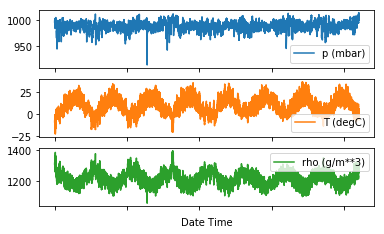

In [41]:
features.plot(subplots=True);

In [42]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [43]:
dataset = (dataset-data_mean)/data_std

In [44]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [45]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [46]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 3)


In [47]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [48]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [50]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

AttributeError: 'RepeatDataset' object has no attribute 'ndim'

In [130]:
import pandas as pd

df = pd.read_csv('Data/1hour/Precipitation/produkt_rr_stunde_19950905_20181231_01975.txt', delimiter=';')
df1 = pd.read_csv('Data/1hour/Precipitation/produkt_rr_stunde_20180531_20191201_01975.txt', delimiter=';')
df2 = pd.read_csv('Data/1hour/Pressure/produkt_p0_stunde_19490101_20181231_01975.txt', delimiter=';')
df3 = pd.read_csv('Data/1hour/Pressure/produkt_p0_stunde_20180531_20191201_01975.txt', delimiter=';')
df4 = pd.read_csv('Data/1hour/Temp_RF/produkt_tu_stunde_19490101_20181231_01975.txt', delimiter=';')
df5 = pd.read_csv('Data/1hour/Temp_RF/produkt_tu_stunde_20180531_20191201_01975.txt', delimiter=';')
df6 = pd.read_csv('Data/1hour/Cloud/produkt_cs_stunde_19490101_20181231_01975.txt', delimiter=';')
df7 = pd.read_csv('Data/1hour/Cloud/produkt_cs_stunde_20180531_20191201_01975.txt', delimiter=';')

//anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,10,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [216]:
df8 = pd.read_csv('Data/1hour/Dew/produkt_td_stunde_19490101_20181231_01975.txt', delimiter=';')
df9 = pd.read_csv('Data/1hour/Dew/produkt_td_stunde_20180531_20191201_01975.txt', delimiter=';')
df_dew = pd.concat([df8,df9],axis=0)

In [132]:
df10 = pd.read_csv('Data/1hour/Cloudiness/produkt_n_stunde_19490101_20181231_01975.txt', delimiter=';')
df11= pd.read_csv('Data/1hour/Cloudiness/produkt_n_stunde_20180531_20191201_01975.txt', delimiter=';')
df_cloudiness = pd.concat([df10,df11],axis=0)

In [133]:
df12 = pd.read_csv('Data/1hour/Soil_temp/produkt_eb_stunde_19610101_20181231_01975.txt', delimiter=';')
df13= pd.read_csv('Data/1hour/Soil_temp/produkt_eb_stunde_20180531_20191201_01975.txt', delimiter=';')
df_soil = pd.concat([df12,df13],axis=0)

In [134]:
df14 = pd.read_csv('Data/1hour/Visibilaty/produkt_vv_stunde_19490101_20181231_01975.txt', delimiter=';')
df15= pd.read_csv('Data/1hour/Visibilaty/produkt_vv_stunde_20180531_20191201_01975.txt', delimiter=';')
df_vis = pd.concat([df14,df15],axis=0)

In [135]:
df16 = pd.read_csv('Data/1hour/Sun/produkt_sd_stunde_19490101_20181231_01975.txt', delimiter=';')
df17= pd.read_csv('Data/1hour/Sun/produkt_sd_stunde_20180531_20191201_01975.txt', delimiter=';')
df_sun = pd.concat([df16,df17],axis=0)

In [136]:
df_solar = pd.read_csv('Data/1hour/Solar/produkt_st_stunde_20050101_20191031_01975.txt', delimiter=';')



In [137]:
df18 = pd.read_csv('Data/1hour/Wind/produkt_f_stunde_19490101_20181231_01975.txt', delimiter=';')
df19= pd.read_csv('Data/1hour/Wind/produkt_f_stunde_20180531_20191201_01975.txt', delimiter=';')
df_windf = pd.concat([df18,df19],axis=0)

In [138]:
df20 = pd.read_csv('Data/1hour/Wind/produkt_ff_stunde_19500101_20181231_01975.txt', delimiter=';')
df21= pd.read_csv('Data/1hour/Wind/produkt_ff_stunde_20180531_20191201_01975.txt', delimiter=';')
df_windff = pd.concat([df18,df19],axis=0)

In [139]:
df_rain=pd.concat([df,df1],axis=0)
df_rain
df_press =pd.concat([df2,df3],axis=0)
df_press
df_temp=pd.concat([df4,df5],axis=0)
df_temp
df_cloud = pd.concat([df6,df7],axis=0)

In [140]:
liste = []
for i in df_solar.MESS_DATUM:
    liste.append(i.replace('','')[:-3])
    

In [141]:
df_solar=df_solar.drop(columns=['MESS_DATUM'])
liste=pd.DataFrame(liste)
liste['MESS_DATUM']=pd.DataFrame(liste)
liste = liste.iloc[:,1]
liste=liste.astype(int)
df_solar = pd.concat([liste,df_solar],axis=1)
df_solar.head()



,MESS_DATUM,STATIONS_ID,QN_592,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,MESS_DATUM_WOZ,eor
0,2005010100,1975,1,120.0,0.0,0.0,0,148.86,2005010101:00,eor
1,2005010101,1975,1,100.0,0.0,0.0,0,144.98,2005010102:00,eor
2,2005010102,1975,1,89.0,0.0,0.0,0,138.39,2005010103:00,eor
3,2005010103,1975,1,104.0,0.0,0.0,0,130.31,2005010104:00,eor
4,2005010104,1975,1,111.0,0.0,0.0,0,121.57,2005010105:00,eor


In [145]:

mess = df_solar['MESS_DATUM']
mess = pd.DataFrame(mess)
mess.rename(columns={"MESS_DATUM": "a"})
df_solar1 = pd.concat([mess,df_solar],axis=1)
df_solar=df_solar.drop(columns=['STATIONS_ID','QN_592','eor','MESS_DATUM_WOZ'])
df_solar=df_solar.drop_duplicates()
df_solar1 = df_solar.set_index('MESS_DATUM')
df_solar1.head()

,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT
MESS_DATUM,,,,,
2005010100,120.0,0.0,0.0,0,148.86
2005010101,100.0,0.0,0.0,0,144.98
2005010102,89.0,0.0,0.0,0,138.39
2005010103,104.0,0.0,0.0,0,130.31
2005010104,111.0,0.0,0.0,0,121.57


In [202]:
#df_rain = df_rain.drop(columns=['STATIONS_ID','QN_8','eor','RS_IND','WRTR'])
#df_rain = df_rain.drop_duplicates()
#df_rain = df_rain.set_index('MESS_DATUM')
#df_rain.columns = df_rain.columns.str.replace('  ', '')
df_rain.iloc[80025]



R1    0.2
Name: 2005010108, dtype: float64

In [165]:
test = df_solar1.join(df_rain)

In [207]:
df_temp = df_temp.drop(columns=['STATIONS_ID','QN_9','eor'])
df_temp = df_temp.drop_duplicates()
df_temp = df_temp.set_index('MESS_DATUM')
df_temp.head()

,TT_TU,RF_TU
MESS_DATUM,,
1949010101,2.1,82.0
1949010102,3.0,79.0
1949010103,3.7,75.0
1949010104,3.3,75.0
1949010105,2.7,75.0


In [ ]:
df_all = test.join(df_temp)

In [214]:
df_dew.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', '  TT', '  TD', 'eor'], dtype='object')

In [217]:
df_dew = df_dew.drop(columns=['STATIONS_ID','QN_8','eor','  TT'])
df_dew = df_dew.drop_duplicates()
df_dew = df_dew.set_index('MESS_DATUM')
df_dew.columns = df_dew.columns.str.replace('  ', '')
df_dew.columns

Index(['TD'], dtype='object')

In [219]:
df_all = df_all.join(df_dew)

In [223]:
df_cloudiness.head()

,STATIONS_ID,MESS_DATUM,QN_8,V_N_I,V_N,eor
0,1975,1949010100,1,P,0,eor
1,1975,1949010101,1,P,8,eor
2,1975,1949010102,1,P,8,eor
3,1975,1949010103,1,P,0,eor
4,1975,1949010104,1,P,4,eor


In [224]:
df_cloudiness = df_cloudiness.drop(columns=['STATIONS_ID','QN_8','eor','V_N_I'])
df_cloudiness = df_cloudiness.drop_duplicates()
df_cloudiness = df_cloudiness.set_index('MESS_DATUM')
df_cloudiness.columns = df_cloudiness.columns.str.replace(' ', '')
df_cloudiness.columns
# Bedeckungsgrad aller Wolken 1/8, nicht erkennbar -1

Index([' V_N'], dtype='object')

In [226]:
df_all = df_all.join(df_cloudiness)

In [231]:
df_cloud.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', ' V_N', 'V_N_I', 'V_S1_CS',
       'V_S1_CSA', 'V_S1_HHS', 'V_S1_NS', 'V_S2_CS', 'V_S2_CSA', 'V_S2_HHS',
       'V_S2_NS', 'V_S3_CS', 'V_S3_CSA', 'V_S3_HHS', 'V_S3_NS', 'V_S4_CS',
       'V_S4_CSA', 'V_S4_HHS', 'V_S4_NS', 'eor'],
      dtype='object')

In [232]:
df_cloud = df_cloud.drop(columns=['STATIONS_ID','QN_8','eor',' V_N','V_N_I'])
df_cloud = df_cloud.drop_duplicates()
df_cloud = df_cloud.set_index('MESS_DATUM')
#df_cloud.columns = df_cloud.columns.str.replace('  ', '')
df_cloud.columns
# -999, SC-999

Index(['V_S1_CS', 'V_S1_CSA', 'V_S1_HHS', 'V_S1_NS', 'V_S2_CS', 'V_S2_CSA',
       'V_S2_HHS', 'V_S2_NS', 'V_S3_CS', 'V_S3_CSA', 'V_S3_HHS', 'V_S3_NS',
       'V_S4_CS', 'V_S4_CSA', 'V_S4_HHS', 'V_S4_NS'],
      dtype='object')

In [234]:
df_all = df_all.join(df_cloud)

In [238]:
df_press.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', '   P', '  P0', 'eor'], dtype='object')

In [239]:
df_press = df_press.drop(columns=['STATIONS_ID','QN_8','eor','  P0'])
df_press = df_press.drop_duplicates()
df_press = df_press.set_index('MESS_DATUM')
df_press.columns = df_press.columns.str.replace('   ', '')
df_press.columns

Index(['P'], dtype='object')

In [241]:
df_all = df_all.join(df_press)

In [246]:
df_sun = df_sun.drop(columns=['STATIONS_ID','QN_7','eor'])
df_sun = df_sun.drop_duplicates()
df_sun = df_sun.set_index('MESS_DATUM')
df_sun.columns

# NaN

Index(['SD_SO'], dtype='object')

In [247]:
df_all = df_all.join(df_sun)

In [251]:
df_windff = df_windff.drop(columns=['STATIONS_ID','QN_8','eor'])
df_windff = df_windff.drop_duplicates()
df_windff = df_windff.set_index('MESS_DATUM')
df_windff.columns = df_windff.columns.str.replace(' ', '')
df_windff.columns


Index(['FF', 'DD'], dtype='object')

In [252]:
df_all = df_all.join(df_windff)

In [258]:
df_soil = df_soil.drop(columns=['STATIONS_ID','QN_2','eor'])
df_soil = df_soil.drop_duplicates()
df_soil = df_soil.set_index('MESS_DATUM')
df_soil.columns

Index(['V_TE002', 'V_TE005', 'V_TE010', 'V_TE020', 'V_TE050', 'V_TE100'], dtype='object')

In [261]:
df_all = df_all.join(df_soil)

In [265]:
df_vis = df_vis.drop(columns=['STATIONS_ID','QN_8','eor','V_VV_I'])
df_vis = df_vis.drop_duplicates()
df_vis = df_vis.set_index('MESS_DATUM')
df_vis.columns

Index(['V_VV'], dtype='object')

In [266]:
df_all = df_all.join(df_vis)

In [268]:
df_all.shape

(134834, 37)

In [275]:
df_all.to_csv(r'weather_data.csv')

In [276]:
#pd.set_option('display.max_rows', df.shape[0])
df_soil

,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100
MESS_DATUM,,,,,,
1961010107,0.5,0.0,0.6,1.2,3.2,-999.0
1961010114,2.3,2.2,2.3,2.1,3.1,5.2
1961010121,2.1,2.2,2.3,2.8,3.3,-999.0
1961010207,-0.4,0.0,0.8,1.8,3.4,-999.0
1961010214,0.1,0.2,0.8,1.4,3.4,5.1
1961010221,0.8,0.8,1.3,1.5,3.3,-999.0
1961010307,1.6,1.6,1.8,1.9,3.3,-999.0
1961010314,3.4,3.2,3.2,2.8,3.4,5.1
1961010321,0.1,0.2,1.3,2.2,3.5,-999.0
